In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics



Data Collection and Processing

In [74]:
# loading the csv data to a pandas DataFrame
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [75]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [76]:
#print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [77]:
#number of raws and columns
gold_data.shape

(2290, 6)

In [78]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [79]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [80]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [81]:
# select only the columns with numerical values
numerical_data = gold_data.select_dtypes(include=['float64', 'int64'])
# calculate the correlation
correlation = numerical_data.corr()

<Axes: >

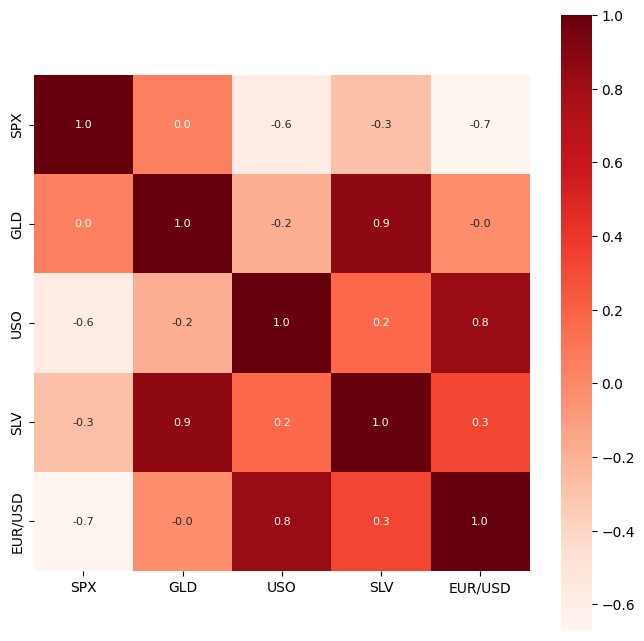

In [82]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [83]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

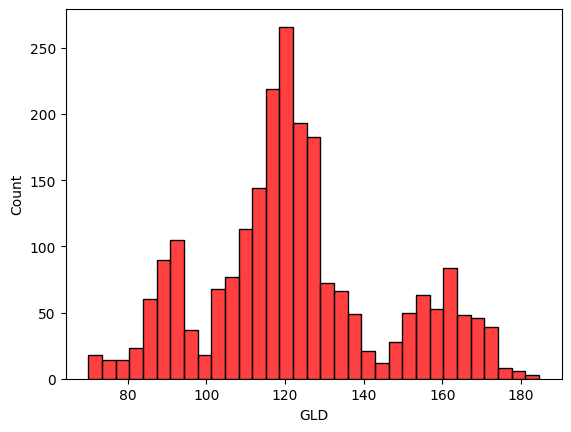

In [84]:
#checking the distribution of the GLD Price
sns.histplot(gold_data['GLD'],color='red')

Splitting the Features and target

In [102]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [86]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [87]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Modal Training

In [113]:
# Initializing different models for comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=3000)
}


In [114]:
# Dictionary to store the R² scores of different models
model_scores = {}

In [115]:
# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, Y_train)  # Training the model
    predictions = model.predict(X_test)  # Making predictions
    r2_score_value = metrics.r2_score(Y_test, predictions)  # Calculating R² score
    model_scores[name] = r2_score_value  # Storing the score

In [116]:
# Displaying the results in a table
results_df = pd.DataFrame(model_scores.items(), columns=["Model", "R2 Score"])
print(results_df)

                  Model  R2 Score
0     Linear Regression  0.865789
1         Decision Tree  0.985726
2         Random Forest  0.989379
3     Gradient Boosting  0.976428
4  Neural Network (MLP)  0.812858


Compare the actual and predict values in a Plot

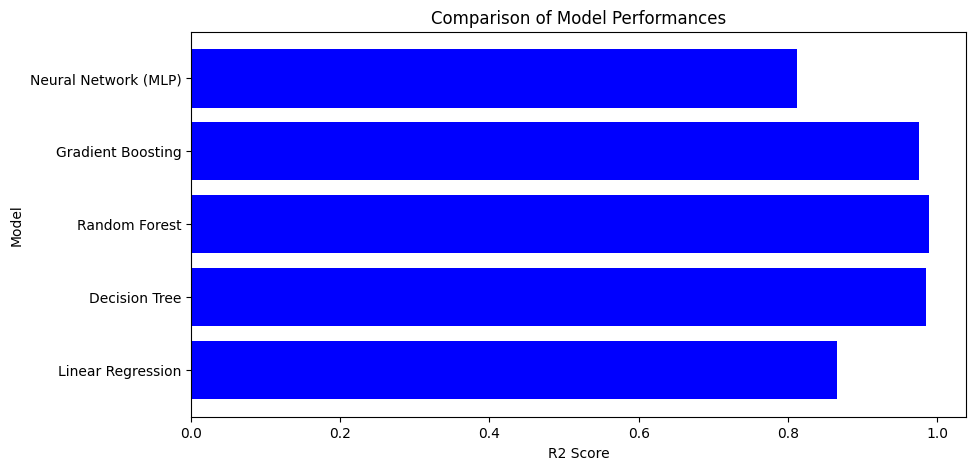

In [117]:
# Visualizing the comparison of model performance
plt.figure(figsize=(10,5))
plt.barh(results_df['Model'], results_df['R2 Score'], color='blue')
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.title("Comparison of Model Performances")
plt.show()

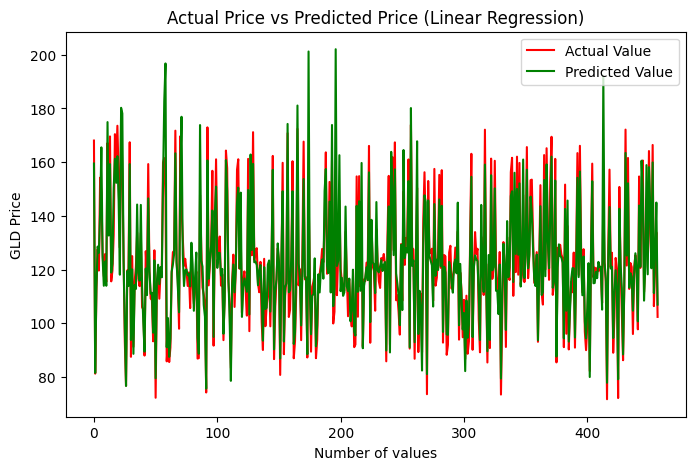

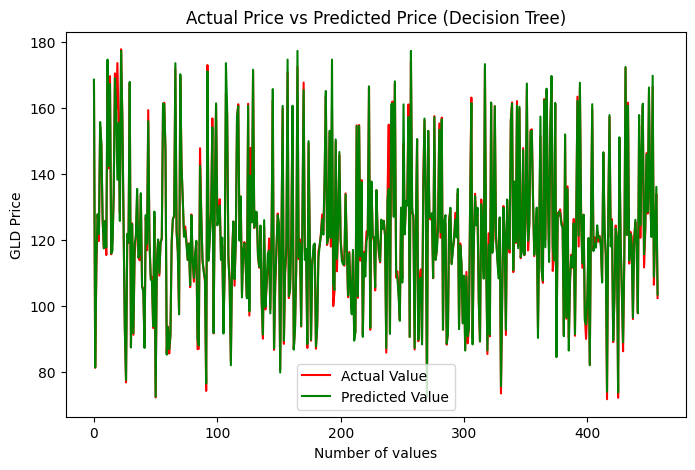

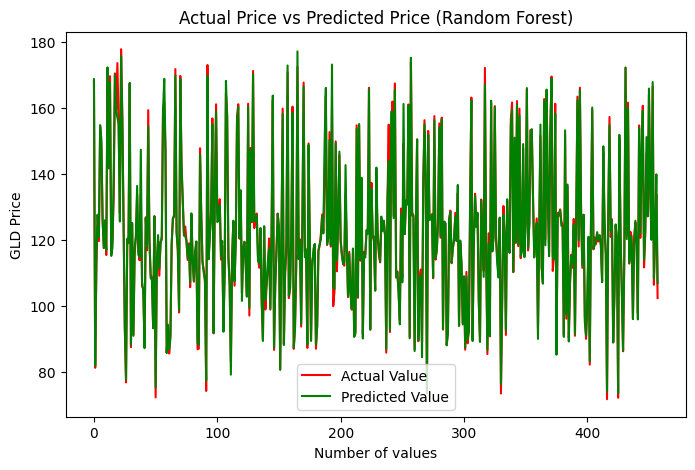

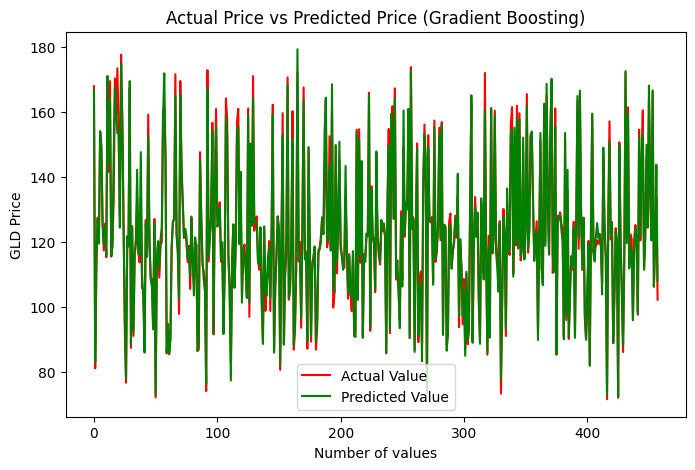

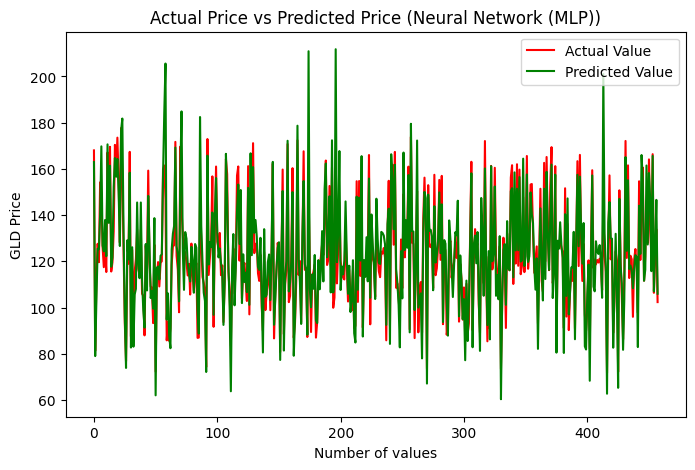

In [118]:
# Comparing Actual vs Predicted values for each model
for name, model in models.items():
    predictions = model.predict(X_test)  # Making predictions

    plt.figure(figsize=(8, 5))
    plt.plot(list(Y_test), color='red', label='Actual Value')  # Actual values in red
    plt.plot(predictions, color='green', label='Predicted Value')  # Predicted values in green
    plt.title(f'Actual Price vs Predicted Price ({name})')
    plt.xlabel('Number of values')
    plt.ylabel('GLD Price')
    plt.legend()
    plt.show()